<a href="https://colab.research.google.com/github/JuniorGunner/DataScienceFormation/blob/master/Pandas/Pandas_Class09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 09 - Removendo Outliers
## Relatório de Análise VIII

![Compressed Boxplot](https://drive.google.com/open?id=13j1SCv0IDwCPJxVnzLFRC-pLZ4TECOIz)

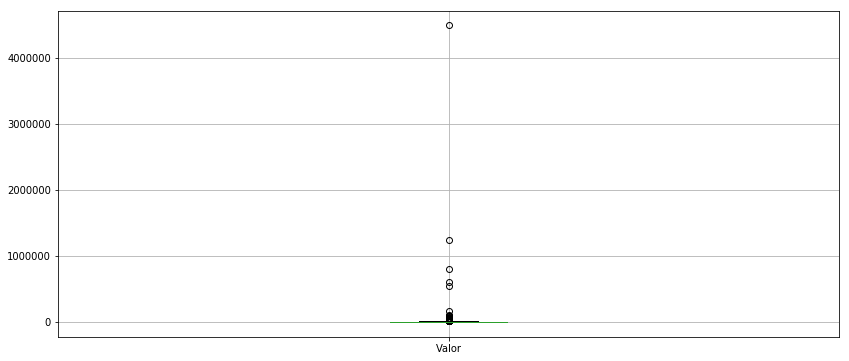

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv('aluguel_residencial.csv', sep = ';')

plt.rc('figure', figsize = (14, 6))

dados.boxplot(['Valor'])

In [30]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [0]:
valor = dados['Valor']
Q1 = valor.quantile(.25) # Primeiro quartil
Q3 = valor.quantile(.75) # Terceiro quartil
IIQ = Q3 - Q1 # Intervalo interquartil
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

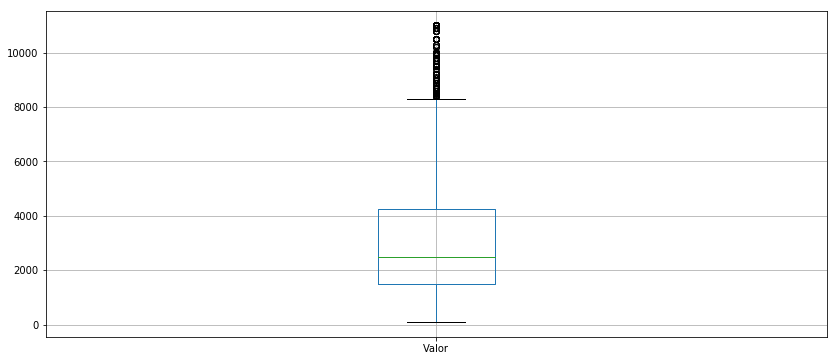

In [32]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3201c52080>]],
      dtype=object)

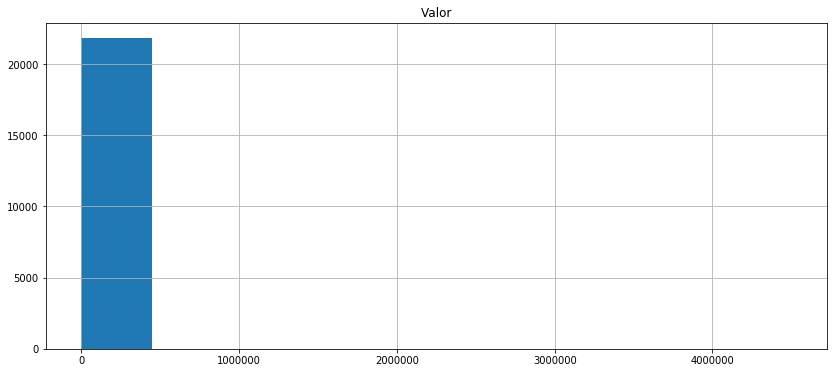

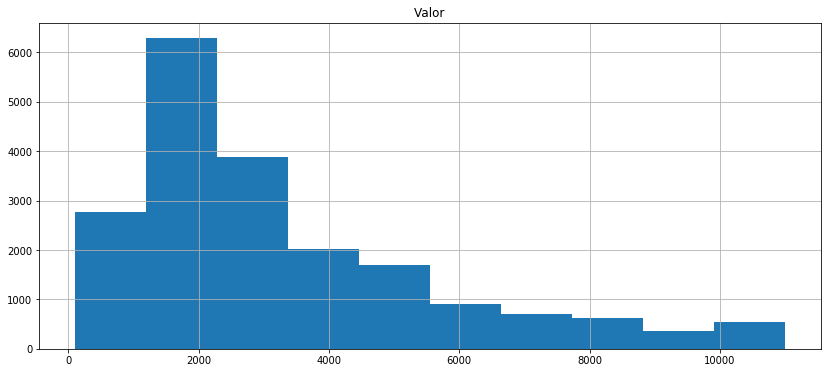

In [33]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e removendo outliers por grupo

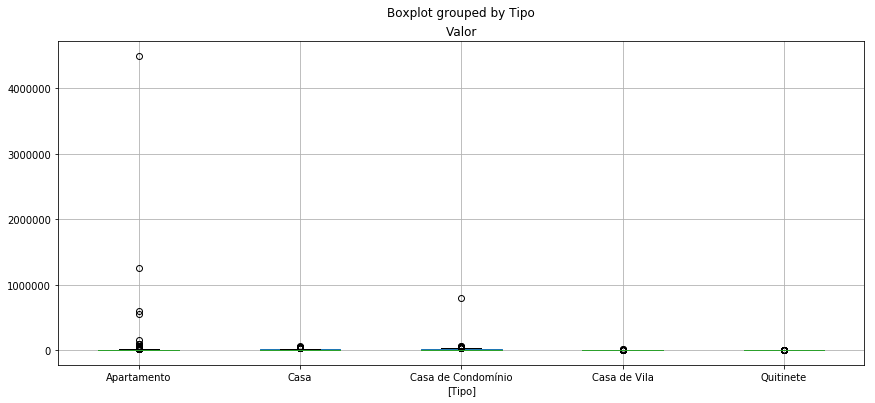

In [34]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [35]:
grupo_tipo = dados.groupby('Tipo')
grupo_tipo

In [36]:
grupo_tipo = dados.groupby('Tipo')['Valor']
grupo_tipo

In [0]:
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [38]:
limite_superior['Apartamento']

9950.0

In [39]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [0]:
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados[selecao]

In [0]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

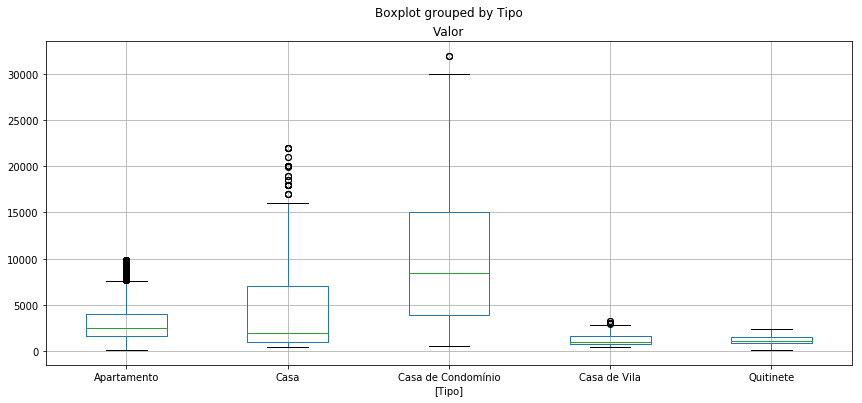

In [42]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [0]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', sep = ';', index = False)

## Extras - Mais sobre gráficos

In [44]:
plt.rc('figure', figsize = (15,8))
dados = pd.read_csv('aluguel.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [45]:
""" Área que sustentará o gráfico """
area = plt.figure()

<Figure size 1080x576 with 0 Axes>

In [0]:
""" Adicionando gráficos na área 
add_subplot(linha, coluna, posição)"""

g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [49]:
g1.set_title('Valor X Área')
g1.scatter(dados['Valor'], dados['Area'])